In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
from google.colab.patches import cv2_imshow

from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.applications import Xception, ResNet50, ResNet101
from keras.applications import VGG16, VGG19
from keras.models import Model

In [ ]:
# Plotting accuracy and loss curve
def plot_history(hist):

        acc = hist.history['accuracy']
        val_acc = hist.history['val_accuracy']

        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        epochs_range = hist.epoch

        plt.figure(figsize=(12, 4))
        plt.suptitle("Training Curve Analysis", fontsize=15)
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.title('Training and Validation Loss')
        plt.show()


In [ ]:
X = np.load('/content/drive/MyDrive/CNN/Sign language detection/DataSet/x_retrain2_180.npz')
y = np.load('/content/drive/MyDrive/CNN/Sign language detection/DataSet/y_retrain2_180.npz')

X = X.f.arr_0
y = y.f.arr_0

print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (472, 180, 180, 3)
y shape: (472,)


In [ ]:
y_encoded = pd.get_dummies(pd.DataFrame(y))
y_encoded

,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,...,0_Q,0_R,0_S,0_T,0_U,0_V,0_W,0_X,0_Y,0_Z
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


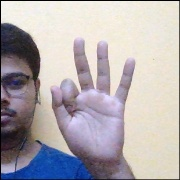

label: 9


In [ ]:
import random
idx = random.randint(0, len(X))

cv2_imshow(X[idx])
print("label:", y[idx])
# print("label:", y_encoded.iloc[idx,:])

In [ ]:
y_encoded.shape

(472, 36)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.05, random_state=42)

# print('X_train shape:',X_train.shape)
# print('X_test shape:',X_test.shape)
# print('y_train shape:',y_train.shape)
# print('y_test shape:',y_test.shape)

X_train shape: (10800, 180, 180, 3)
X_test shape: (1200, 180, 180, 3)
y_train shape: (10800, 36)
y_test shape: (1200, 36)


In [ ]:
# net = VGG16(input_shape=(180, 180, 3), weights='imagenet', include_top=False)

# for layer in net.layers:
#     layer.trainable = False


# l0 = Flatten()(net.output)
# l1 = Dense(256, activation='relu')(l0)
# # l2 = Dropout(0.5)(l1)
# prediction = Dense(36, activation='softmax')(l1)

# model = Model(net.input, prediction)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [ ]:
# history = model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2, use_multiprocessing=True)

Epoch 1/2
120/120 [==============================] - 27s 217ms/step - loss: 1.9018 - accuracy: 0.8543 - val_loss: 0.1557 - val_accuracy: 0.9719
Epoch 2/2
120/120 [==============================] - 26s 219ms/step - loss: 0.0335 - accuracy: 0.9913 - val_loss: 0.0289 - val_accuracy: 0.9937


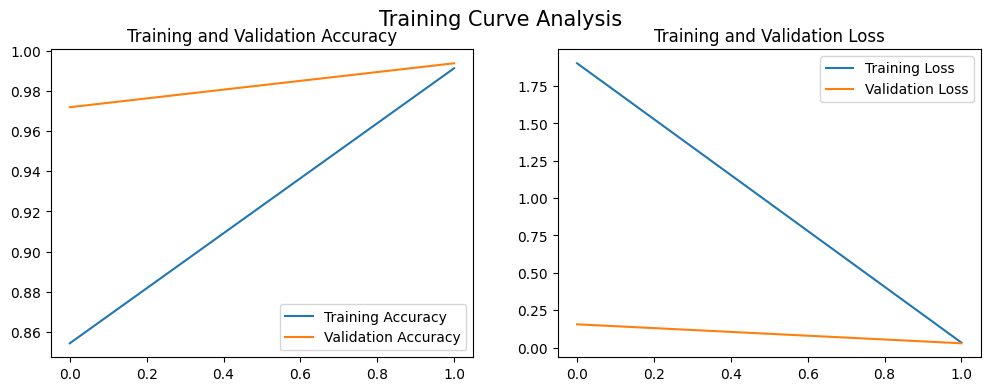

In [ ]:
# plot_history(history)

In [ ]:
# result = model.evaluate(X_train, y_train)

300/300 [==============================] - 26s 88ms/step - loss: 0.0107 - accuracy: 0.9976


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/CNN/Sign language detection/DataSet/models/sign_language_detector_e10_V6.h5')
# model = keras.models.load_model('/content/drive/MyDrive/CNN/Sign language detection/DataSet/models/sign_language_detector_e2_V4.h5')

In [ ]:
history = model.fit(X, y_encoded, epochs=6, batch_size=64, validation_split=0.2, use_multiprocessing=True)

Epoch 1/6
6/6 [==============================] - 25s 2s/step - loss: 1.2261 - accuracy: 0.9204 - val_loss: 0.7014 - val_accuracy: 0.9474
Epoch 2/6
6/6 [==============================] - 2s 267ms/step - loss: 0.1616 - accuracy: 0.9708 - val_loss: 0.2410 - val_accuracy: 0.9579
Epoch 3/6
6/6 [==============================] - 2s 264ms/step - loss: 0.0844 - accuracy: 0.9894 - val_loss: 0.5611 - val_accuracy: 0.9368
Epoch 4/6
6/6 [==============================] - 1s 261ms/step - loss: 0.1084 - accuracy: 0.9788 - val_loss: 0.3141 - val_accuracy: 0.9368
Epoch 5/6
6/6 [==============================] - 2s 265ms/step - loss: 0.0464 - accuracy: 0.9973 - val_loss: 0.3340 - val_accuracy: 0.9474
Epoch 6/6
6/6 [==============================] - 1s 260ms/step - loss: 7.6088e-04 - accuracy: 1.0000 - val_loss: 0.3546 - val_accuracy: 0.9474


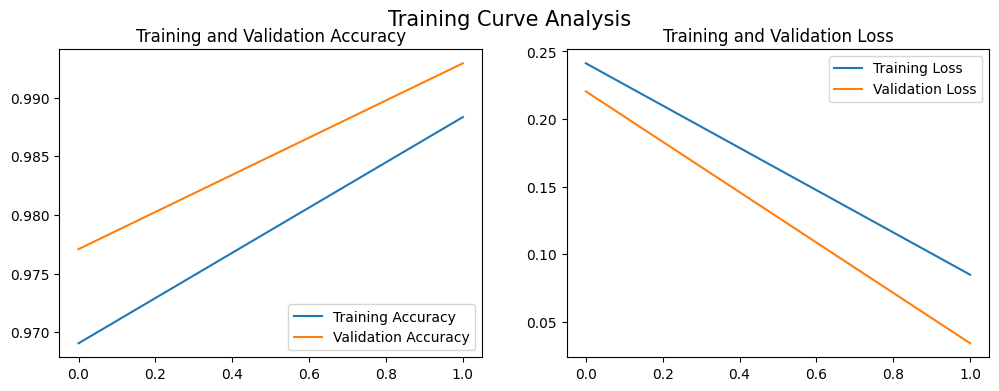

In [ ]:
plot_history(history)

In [ ]:
plot_history(history)

In [ ]:
result = model.evaluate(X, y_encoded)

14/14 [==============================] - 1s 88ms/step - loss: 0.1202 - accuracy: 0.9773


In [ ]:
model.save('/content/drive/MyDrive/CNN/Sign language detection/DataSet/models/sign_language_detector_e6_V7.h5')

In [ ]:
import os
directory = '/content/drive/MyDrive/CNN/Sign language detection/DataSet/test_image/'

In [ ]:
for path in os.listdir(directory):
  img = cv2.imread(directory + path)
  img = cv2.resize(img, (180,180))
  # img = cv2.flip(img, 1)
  cv2_imshow(img)
  img = np.expand_dims(img, axis=0)

  y_pred = model.predict(img)
  idx = np.argmax(y_pred, axis=1)[0]
  if idx < 10:
    print(idx)
  else:
    print(chr(idx - 10 + 65))
  print('Accuracy:', np.max(y_pred))
  # print(y_pred)